In [22]:
%%capture
! pip install arviz==0.11.00
! pip install pymc3==3.10.0

In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
from pymc3 import math

from theano import tensor as tt

# Exam scores
  
Exam result consistent of 2 group of students - one group is purely guess and the other with a >.5 accuracy rate

$$ z_{i} \sim \text{Bernoulli}(0.5)  $$
$$ \phi \sim \text{Uniform}(0.5, 1) $$
$$ \psi = 0.5 $$  
$$   \theta_{i} \sim
\begin{cases}
\phi  & \text{if $z_{i} = 1$} \\
\psi  & \text{if $z_{i} = 0$}
\end{cases}  $$
$$ k_{i} \sim \text{Binomial}(\theta_{i}, n) $$

# Data

In [23]:
k = np.array([21, 17, 21, 18, 22, 31, 31, 34, 34, 35, 35, 36, 39, 36, 35])
p = len(k)  # number of people
n = 40  # number of questions

# Model

In [24]:
with pm.Model() as model:
    # group prior
    zi = pm.Bernoulli("zi", p=0.5, shape=p)
    # accuracy prior
    phi = pm.Uniform("phi", upper=1, lower=0.5)
    psi = 0.5
    theta = pm.Deterministic("theta", phi * tt.eq(zi, 1) + psi * tt.eq(zi, 0))

    # observed
    ki = pm.Binomial("ki", p=theta, n=n, observed=k)

    trace = pm.sample()

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Sequential sampling (2 chains in 1 job)
CompoundStep
>BinaryGibbsMetropolis: [zi]
>NUTS: [phi]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 7 seconds.


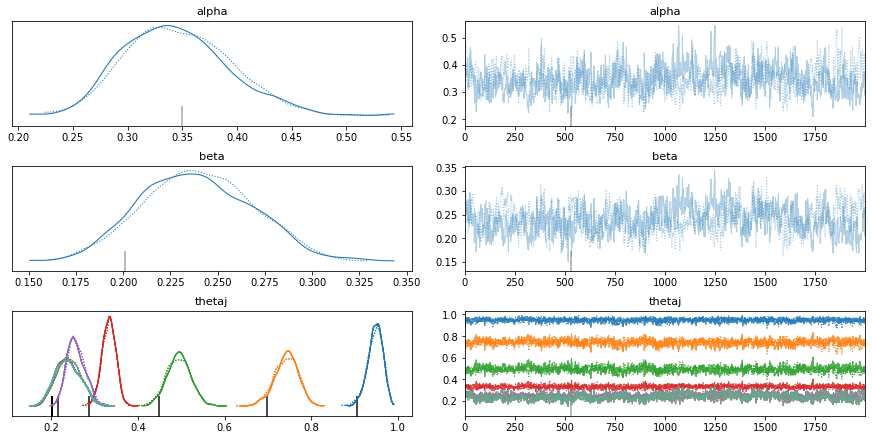

In [7]:
ztrace = trace1["zi"]
print("Grouping", ztrace[-1, :])

az.plot_trace(trace, var_names=["zi", "phi"], compact=True);

In [9]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
kij_missing[0],4.158,1.739,1.000,7.000,0.178,0.126,96.0,96.0,96.0,113.0,1.03
kij_missing[1],4.318,1.755,1.000,7.000,0.224,0.159,62.0,62.0,61.0,84.0,1.04
kij_missing[2],4.382,1.870,1.000,7.000,0.248,0.176,57.0,57.0,57.0,93.0,1.05
kij_missing[3],17.184,0.920,16.000,18.000,0.061,0.044,224.0,224.0,240.0,309.0,1.01
kij_missing[4],13.286,1.724,10.000,16.000,0.166,0.118,108.0,108.0,109.0,182.0,1.00
kij_missing[5],9.001,2.016,5.000,12.000,0.210,0.151,92.0,90.0,93.0,100.0,1.00
kij_missing[6],6.322,1.919,2.000,9.000,0.254,0.181,57.0,57.0,57.0,126.0,1.04
kij_missing[7],4.520,1.817,1.000,7.000,0.209,0.148,76.0,76.0,74.0,91.0,1.01
kij_missing[8],4.258,1.923,1.000,8.000,0.381,0.273,25.0,25.0,24.0,87.0,1.09
kij_missing[9],4.056,1.980,0.000,7.000,0.253,0.180,61.0,61.0,65.0,139.0,1.01


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb61249acd0>,
      dtype=object)

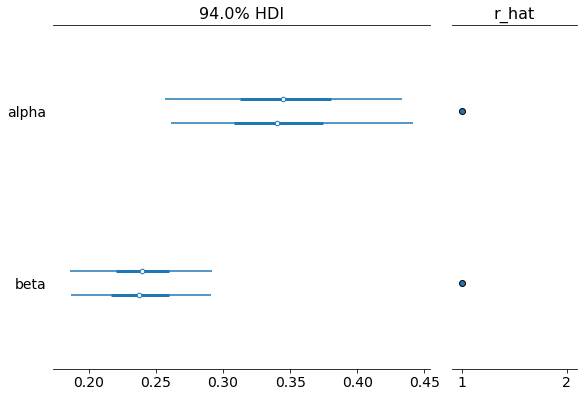

In [17]:
az.plot_forest(trace, var_names= ["alpha", "beta"], r_hat=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5ff5b4950>,
      dtype=object)

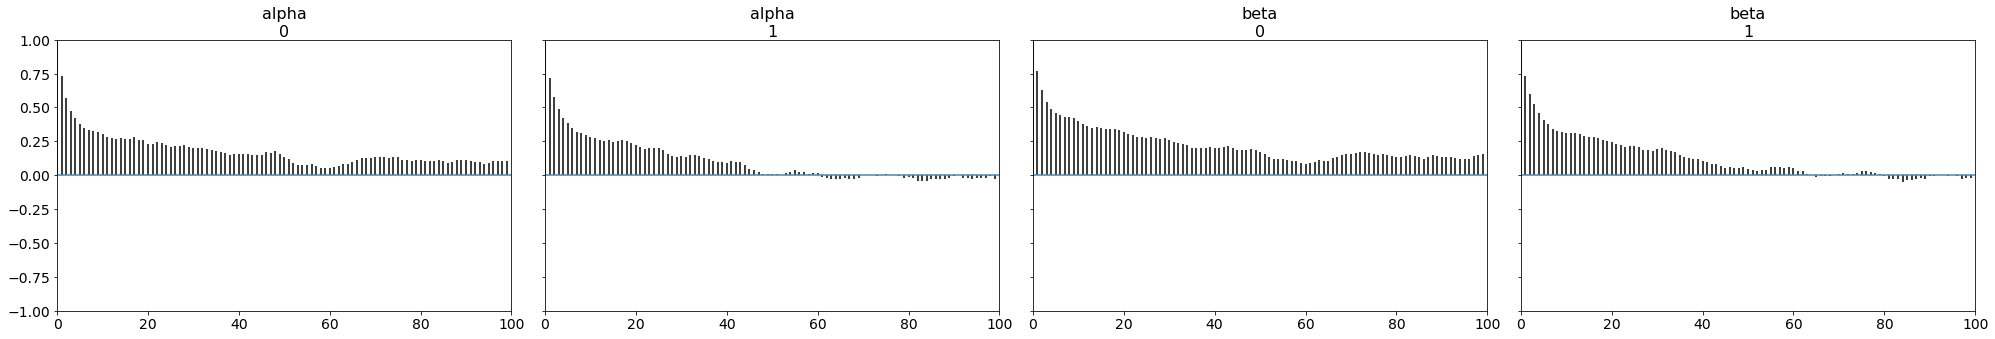

In [14]:
az.plot_autocorr(trace, var_names=['alpha', 'beta'])